## Stock Market Analysis 

This project centers around predicting stock prices and analysing stock risk, based on previous stock performance. We will also predict previous stock prices. We are interested in asking the following questions:

1. What was the change in stock price over time?
2. What was the average daily return of the stock?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. what was the correlation between different stocks' daily returns?
6. how much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behaviour?

Credit for the project goes to Jose Portilla's Udemy course on data analysis and visualisation in Python.

#### Basic Analysis of Stock Information 

Retrieving different stocks and analysing basic attributes of a stock:

In [2]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

# others
import pandas_datareader as pdr
from datetime import datetime

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock,'yahoo',start,end)

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.480715,190.559603,192.479325,192.580437,3.251940e+07,191.239701
std,21.758249,21.569369,21.630732,21.644905,1.386264e+07,21.217154
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,141.039642
25%,175.967499,173.747501,174.872501,174.832497,2.308030e+07,174.111996
50%,196.165001,192.599998,194.279999,194.180000,2.942395e+07,193.582848
75%,210.074997,206.832497,209.312500,208.872498,3.876472e+07,206.713852
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-07-18 to 2019-07-18
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


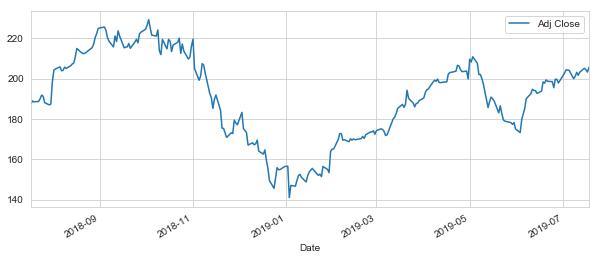

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

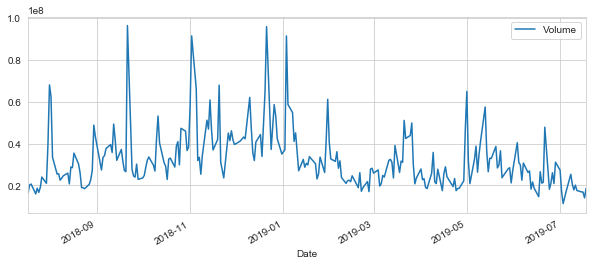

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [22]:
ma_day = [10,20,50] # Different rolling mean windows
AAPL = DataFrame(AAPL)

for ma in ma_day:
    column_name = "MA for {} days".format(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

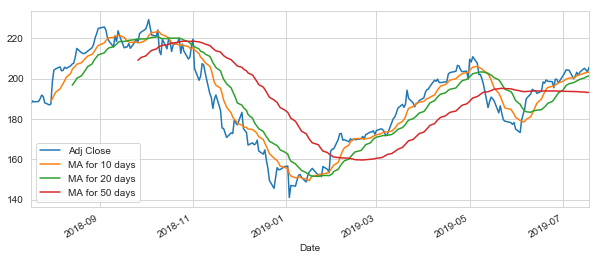

In [23]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

We can clearly see that the moving average gets smoother and is less subsceptible to daily fluctuations as the moving average window increases.

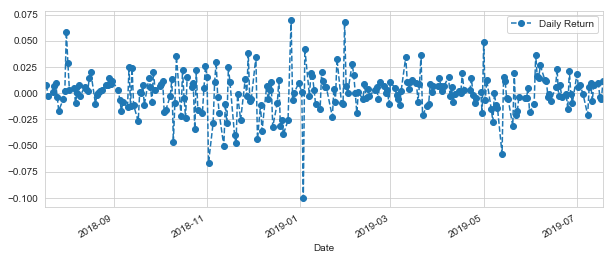

In [25]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() #Daily return for each day in the past year

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o') 

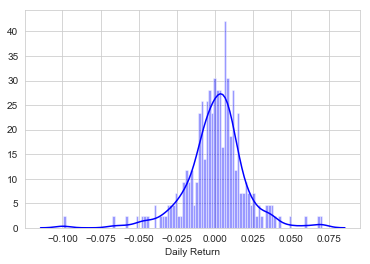

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [28]:
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [29]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-18,187.545181,1842.920044,1195.880005,103.440285
2018-07-19,189.003006,1812.969971,1186.959961,102.731789
2018-07-20,188.569595,1813.699951,1184.910034,104.571907
2018-07-23,188.737030,1802.000000,1205.500000,106.244736
2018-07-24,190.106216,1829.239990,1248.079956,105.939697


In [31]:
tech_rets = closing_df.pct_change() # Getting returns by percentage change for each day

In [32]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-18,NaN,NaN,NaN,NaN
2018-07-19,0.007773,-0.016251,-0.007459,-0.006849
2018-07-20,-0.002293,0.000403,-0.001727,0.017912
2018-07-23,0.000888,-0.006451,0.017377,0.015997
2018-07-24,0.007254,0.015117,0.035321,-0.002871


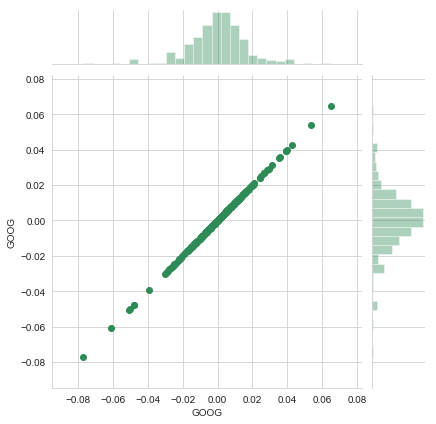

In [34]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen') # Testing out - we should get a perfect correlation

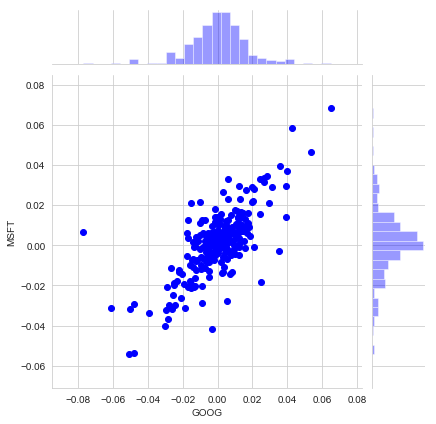

In [35]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='blue') # As an example. We can do this for others too

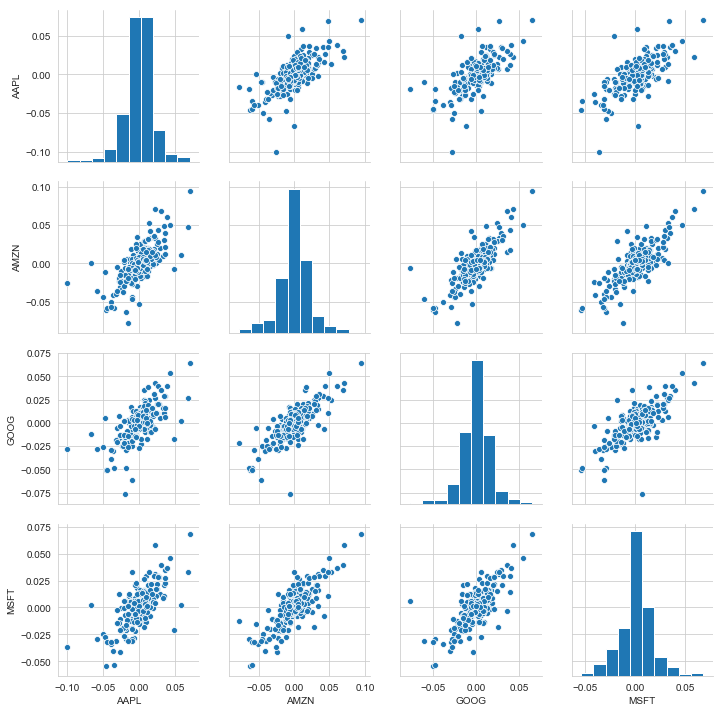

In [36]:
sns.pairplot(tech_rets.dropna()) # Gives us correlations between each stock 

This suggests all the tech stocks have varying strengths of the same type of correlation - a positive one. 

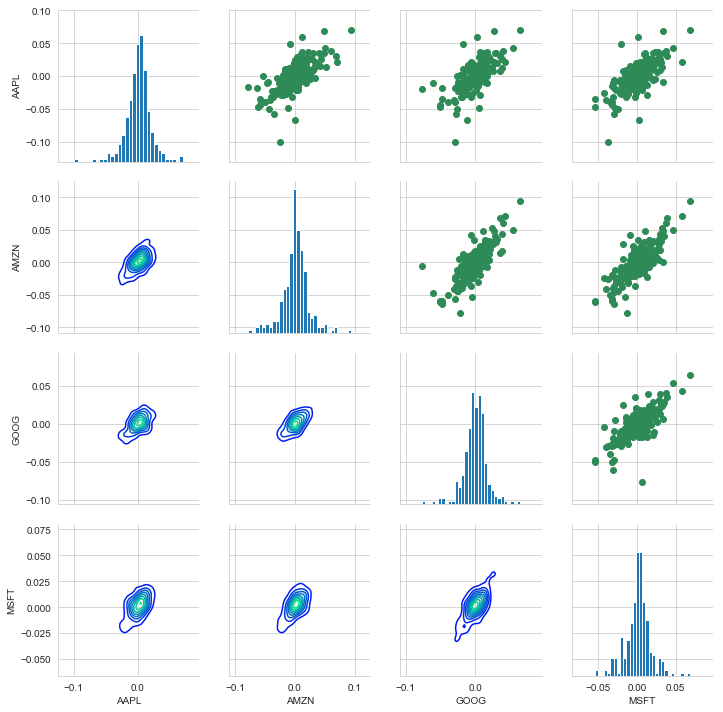

In [38]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='seagreen') # Doing paired plot of kde plots and scatter plots

returns_fig.map_lower(sns.kdeplot,cmap='winter')

returns_fig.map_diag(plt.hist,bins=30)

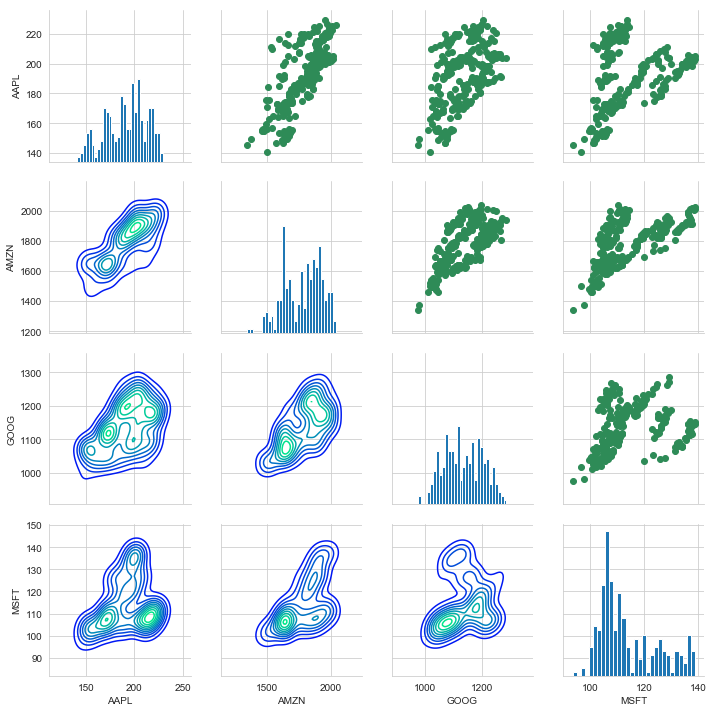

In [39]:
returns_fig = sns.PairGrid(closing_df.dropna()) # This time looking at the closing prices

returns_fig.map_upper(plt.scatter,color='seagreen') # Doing paired plot of kde plots and scatter plots

returns_fig.map_lower(sns.kdeplot,cmap='winter')

returns_fig.map_diag(plt.hist,bins=30)

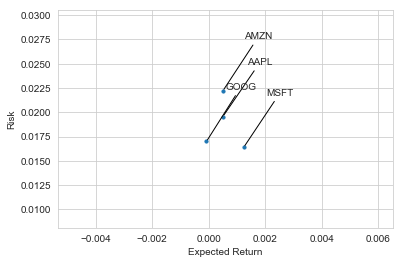

In [76]:
# Now we can begin doing some risk analysis on the dataset. We quantify risk using the standard deviation.
rets = tech_rets.dropna()

area = 10
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy = (x, y), xytext=(50, 50), textcoords='offset points', 
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-',connectionstyle='arc,rad=-0.5',color='black'))

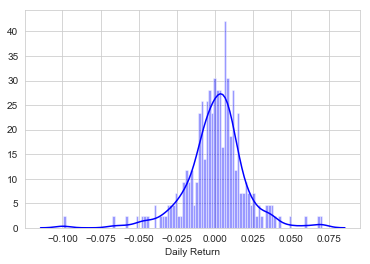

In [78]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [79]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-19,0.007773,-0.016251,-0.007459,-0.006849
2018-07-20,-0.002293,0.000403,-0.001727,0.017912
2018-07-23,0.000888,-0.006451,0.017377,0.015997
2018-07-24,0.007254,0.015117,0.035321,-0.002871
2018-07-25,0.009430,0.018789,0.012515,0.029445


In [80]:
rets['AAPL'].quantile(0.05) # testing quantile for 95% confidence of being above loss.

-0.031226853356227546

In [90]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [96]:
# For explanation of how this works see http://www.investopedia.com/articles/07/montecarlo.asp
# We find the future price by using a formula where the future stock price is calculated as a combination of shock and drift.

def stock_monte_carlo(start_price,days,mu,sigma): # This function predicts stock variance over time
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for i in range(1,days):
        
        shock[i] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[i] = mu*dt
        price[i] = price[i-1] + (price[i-1] * (drift[i] + shock[i]))
        
    return price

In [97]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-18,1204.500000,1190.339966,1196.560059,1195.880005,1393600,1195.880005
2018-07-19,1200.000000,1183.319946,1191.000000,1186.959961,1276700,1186.959961
2018-07-20,1196.859985,1184.219971,1186.959961,1184.910034,1247400,1184.910034
2018-07-23,1206.489990,1181.000000,1181.010010,1205.500000,2619200,1205.500000
2018-07-24,1266.000000,1235.560059,1262.589966,1248.079956,3318200,1248.079956


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

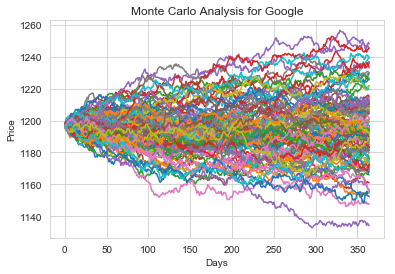

In [99]:
start_price = 1196.56

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [101]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final Price distribution for Google Stock after 365 days')

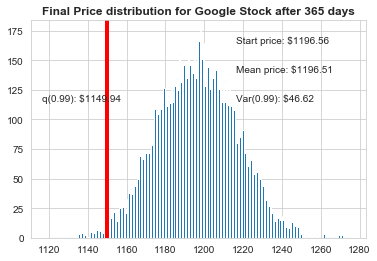

In [104]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Start price
plt.figtext(0.6,0.8,s="Start price: ${:.2f}".format(start_price))
# Mean end price
plt.figtext(0.6,0.7,"Mean price: ${:.2f}".format(simulations.mean()))

# Variance of the price (within 99% CI)
plt.figtext(0.6,0.6,"Var(0.99): ${:.2f}".format(start_price-q))

# Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99): ${:.2f}'.format(q))

# Line at 1% qu.
plt.axvline(x=q,linewidth=4,color='r')

# Title
plt.title('Final Price distribution for Google Stock after {} days'.format(days),weight='bold')